## Observations and Insights 

In this study, 249 mice identified with SCC tumor growth were treated through a variety of drug regimens. Over the course of 45 days, tumor development was observed and measured. The observations we have made are that Capomulin and Ramicane were the most effective drugs for reducing tumors. Another observation was the weight of the mouse had a strong positive correlation with the size of the tumor. Lastly, the ratio of male to female mice was even.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress



# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_data = pd.merge(mouse_metadata, study_results, on= 'Mouse ID')
merged_data
# Display the data table for preview


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
merged_data['Mouse ID'].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoints 
merged_data[merged_data.duplicated(['Mouse ID','Timepoint'])]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
merged_data[merged_data['Mouse ID']=='g989']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean = merged_data[merged_data['Mouse ID']!='g989']

In [6]:
# Checking the number of mice in the clean DataFrame.
clean['Mouse ID'].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
grp = clean.groupby('Drug Regimen')['Tumor Volume (mm3)']

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
pd.DataFrame({
    'mean': grp.mean(),
    'median':grp.median(),
    'variance': grp.var(),
    'standard deviation': grp.std(),
    'SEM': grp.sem()
})

,mean,median,variance,standard deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
grp.agg(['mean','median','var','std','sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Measurements')

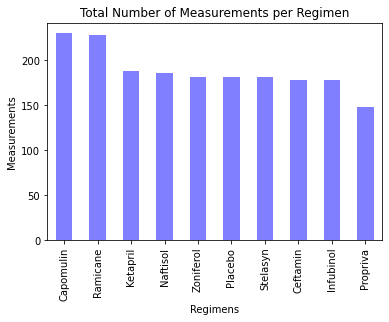

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
bar = clean['Drug Regimen'].value_counts().plot.bar(color='b', alpha=0.5, align="center")
bar.set_title("Total Number of Measurements per Regimen")
bar.set_xlabel('Regimens')
bar.set_ylabel('Measurements')


Text(0.5, 1.0, 'Number of Measurements Per Drug Regimen')

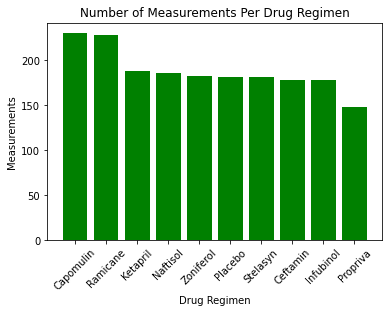

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
#Calculate Measurements per regimen
counts = clean['Drug Regimen'].value_counts()
#Set x axis to the length of the counts 
x_axis = np.arange(len(counts))
#plt bar plot
plt.bar(x_axis, counts, color='g',align='center')
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, counts.index.values)


plt.xticks(rotation=45)
plt.xlabel('Drug Regimen')
plt.ylabel('Measurements')
plt.title('Number of Measurements Per Drug Regimen')

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#create groupby of gender
gender_grp = clean.groupby('Sex')
#count number of mice per sex
gender_count = pd.DataFrame(gender_grp['Mouse ID'].nunique())
gender_count

,Mouse ID
Sex,
Female,123
Male,125


Text(0, 0.5, '')

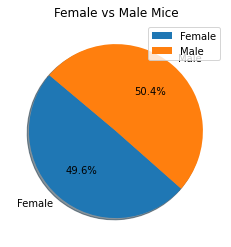

In [12]:
pie = gender_count.plot(kind='pie', y='Mouse ID', title='Female vs Male Mice',startangle=140, autopct='%1.1f%%',shadow=True)
pie.set_ylabel('')

C:\Users\roger\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


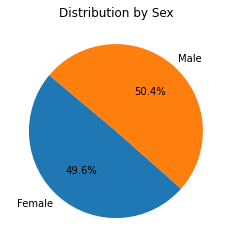

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_count, labels=gender_count.index.values, autopct='%1.1f%%', startangle=140)
plt.title('Distribution by Sex')
plt.show()


## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumor_df = clean.groupby('Mouse ID')['Timepoint'].max().reset_index().merge(clean,on=['Mouse ID','Timepoint'],how='left')
tumor_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tomor_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
for drug in drugs:
    drug_data = tumor_df[tumor_df['Drug Regimen'] == drug]['Tumor Volume (mm3)']
    iqr = drug_data.quantile(.75) - drug_data.quantile(.25)
    upper = drug_data.quantile(.75) + 1.5*iqr
    lower = drug_data.quantile(.25) - 1.5*iqr
    
    
    # add subset 
    tomor_list.append(drug_data)
    
    # Determine outliers using upper and lower bounds
    print(f'outliers for {drug} are: {drug_data[(drug_data>upper) | (drug_data<lower)]}')

outliers for Capomulin are: Series([], Name: Tumor Volume (mm3), dtype: float64)
outliers for Ramicane are: Series([], Name: Tumor Volume (mm3), dtype: float64)
outliers for Infubinol are: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
outliers for Ceftamin are: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [16]:
drug_data


3      62.999356
21     45.000000
22     56.057749
25     55.742829
58     48.722078
75     47.784682
88     61.849023
94     68.923185
106    67.748662
107    57.918381
109    46.784535
110    59.851956
113    64.299830
134    59.741901
150    61.433892
154    64.192341
184    45.000000
188    52.925348
189    45.000000
209    67.527482
223    45.000000
228    64.634949
231    61.386660
238    68.594745
240    64.729837
Name: Tumor Volume (mm3), dtype: float64

In [17]:
lower

25.355449580000002

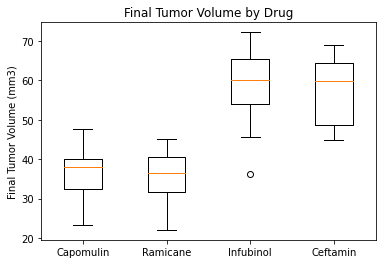

In [18]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tomor_list)
plt.title('Final Tumor Volume by Drug')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1,2,3,4], drugs)
plt.show()

## Line and Scatter Plots

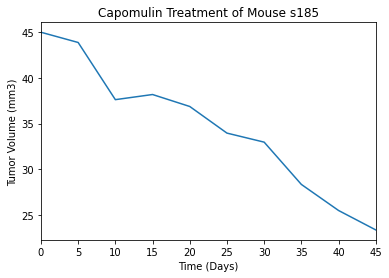

In [36]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#finds single mouse
#cap = merged_data[merged_data['Drug Regimen']=='Capomulin']
#cap.head()
capo = clean.loc[clean['Drug Regimen'] == 'Capomulin']
capo

mouse = clean.loc[clean["Mouse ID"] == "s185"]
mouse

plt.plot(mouse['Timepoint'], mouse['Tumor Volume (mm3)'])

plt.xlabel("Time (Days)")
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin Treatment of Mouse s185')
plt.xlim(0,45)
plt.ylim()
plt.show()




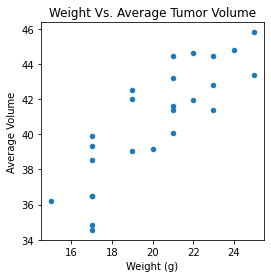

In [20]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capo.head()

reduced = capo.loc[:, ['Mouse ID', 'Weight (g)', 'Tumor Volume (mm3)']]
reduced.head(1)

avg_tumor = pd.DataFrame(reduced.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()
avg_tumor.head()

avg_tumor = avg_tumor.rename(columns={'Tumor Volume (mm3)': 'Average Volume'})
avg_tumor.head()

avg_tumor = avg_tumor.set_index('Mouse ID')

avg_tumor.plot(kind="scatter", x="Weight (g)", y="Average Volume", figsize=(4,4),
              title="Weight Vs. Average Tumor Volume")
plt.show()

## Correlation and Regression

In [21]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


In [22]:
mouse_weight = avg_tumor.iloc[:,0]
total_avg_vol = avg_tumor.iloc[:,1]
correlation = st.pearsonr(mouse_weight,total_avg_vol)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


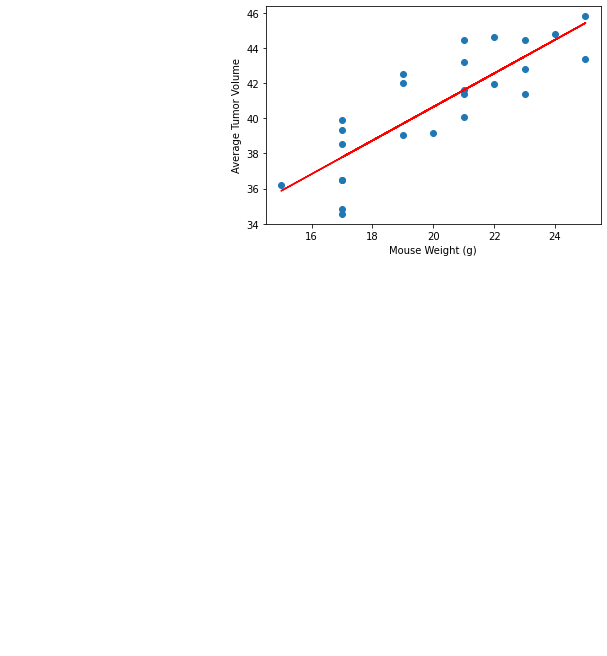

In [23]:
#plot
x_values = avg_tumor['Weight (g)']
y_values = avg_tumor['Average Volume']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume')
plt.show()
